In [2]:
using Revise
using TetAR
using Distributions, StatsBase, DataFrames,Random
using LaTeXStrings
using LinearAlgebra, Permutations, Combinatorics,Distributions
import PythonPlot as plt
plt.svg(true)

NSF_CAREER_PATH = "/Users/elevien/Dartmouth College Dropbox/Ethan Levien/PROPOSALS/NSFCareer2024/figures/growth_dynamics"

function rescale(x)
    (x .- mean(x)) ./std(x)
end

Random.seed!(1234)

TaskLocalRNG()

In [4]:

function generator(init,theta)
    tau_prev = init[2]
    a = 0.8
    tau = max(0.00001,tau_prev*a + (1-a) + sqrt(1-a^2)rand(Normal(0,0.3)))
    time = init[1] + tau
    return hcat([init[1],tau],[time,tau])'
end


theta = []
init = [0,1]
Tmax = 6
function terminate(cell)
    cell.label[end,1]>Tmax
end


root = TetAR.create_cell(generator(init,theta))
TetAR.grow_tree!(root,terminate,theta,generator)

# trim the tree
for node in TetAR.get_leaf_nodes(root)
    node.label[end,1] = Tmax
end

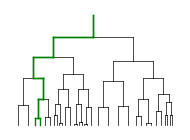

In [16]:
PATH = "/Users/elevien/Dropbox (Dartmouth College)/TALKS/2024/BU24/figures/trees"
fig,ax = plt.subplots(figsize=(2,1.5))

x0,y0,depth,h,lw = 0,0,0,1,0.5
TetAR.recursive_draw_tree(ax,root,x0,y0,depth,h,lw)


ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)
ax.spines["bottom"].set_visible(false)
ax.spines["left"].set_visible(false)
plt.tick_params(left = false, right = false , labelleft = false,labelbottom = false, bottom = false) 

plt.tight_layout()

lw = 1
x,y,depth = TetAR.recursive_draw_lineage(ax,root,x0,y0,0,h,lw,"g")
#ax.text(x-0.01,y-0.5,latexstring("n=",depth),color="r",fontsize=7)
# plt.savefig(PATH*"/tree1.pdf")

x,y,depth = TetAR.recursive_draw_lineage(ax,root,x0,y0,0,h,lw,"g")
#ax.text(x-0.01,y-0.5,latexstring("n=",depth),color="b",fontsize=7)
# plt.savefig(PATH*"/tree2.pdf")

# x,y,depth =  TetAR.recursive_draw_lineage(ax,root,x0,y0,0,h,lw,"g")
# ax.text(x-0.01,y-0.5,latexstring("n=",depth),color="g",fontsize=7)
# # ax.get_yaxis().set_ticks([])
# #FIG_PATH_GRANT = "/Users/elevien/Dropbox (Dartmouth College)/Apps/Overleaf/NSF_eMB_2024/figures"
plt.savefig(NSF_CAREER_PATH*"/intro_tree.pdf")
fig